<a href="https://colab.research.google.com/github/usamaali3742/face-recognition-system-/blob/main/Copy_of_FaceAttendance_Usama_Code_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
import cv2
import numpy as np
import face_recognition
import os
from datetime import datetime
import time
import matplotlib.pyplot as plt
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
#import cv2
#import numpy as np
#import PIL
import io
import html
#import time

In [ ]:
#!unzip '/content/Faces data bcs 8th (1).zip'

In [ ]:

path = '/content/dataset'
#!ls 'images'
images = []
personNames = []
myList = os.listdir(path)
print(myList)

['Abidullah', 'Usamaali', 'Mubshair khan', 'Ihsan', 'Ajmal khan', 'Jameel yusaf', 'Mubshair sardar', 'Sajid', 'Fahad faraz', 'Alam shah', 'Waseem', 'Junaid', 'Sami']


In [ ]:
path = '/content/dataset/Usamaali'
myList = os.listdir(path)
images_names = []
for cu_img in myList:
    current_Img = cv2.imread(f'{path}/{cu_img}')
    images.append(current_Img)
    images_names.append(os.path.splitext(cu_img)[0])
print(images_names)

['Usama3', 'Usama2', 'Usama5', 'Usama6', 'Usama8', 'Usama1', 'Usama7', 'Usama4', 'Usama10', 'Usama9']


In [ ]:
#def faceEncodings(images):
   # encodeList = []
    #for img in images:
     #   img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      #  encode = face_recognition.face_encodings(img)[0]
       # encodeList.append(encode)
    #return encodeList

#print(faceEncodings(images))
#encodeListKnown = faceEncodings(images)
#print('All Encodings Complete!!!')

In [ ]:
def attendance(name):
    with open('Attendance.csv', 'r+') as f:
        myDataList = f.readlines()
        nameList = []
        for line in myDataList:
            entry = line.split(',')
            nameList.append(entry[0])
        if name not in nameList:
            time_now = datetime.now()
            tStr = time_now.strftime('%H:%M:%S')
            dStr = time_now.strftime('%d/%m/%Y')
            f.writelines(f'\n{name},{tStr},{dStr}')

In [ ]:
#encodeListKnown = faceEncodings(images)
#print(encodeListKnown)
#print('All Encodings Complete!!!')

In [ ]:
## Crop the Face from image
def faceOfImg(img):
  faceLoc = face_recognition.face_locations(img)
  # print(faceLoc[0])

  x = faceLoc[0][3]
  y = faceLoc[0][0]
  x2 = faceLoc[0][1]
  y2 = faceLoc[0][2]
  w = x2-x
  h = y2-y

  #print(y2)
  bbox = faceLoc[0]
  crop_img = img[y:y+h, x:w+x]
  return crop_img

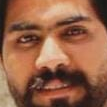

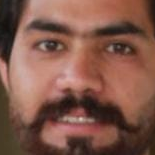

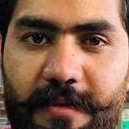

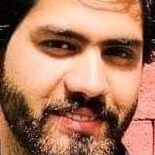

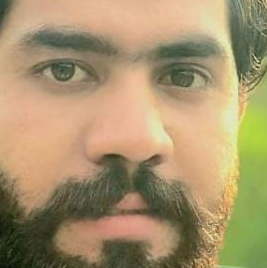

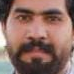

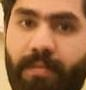

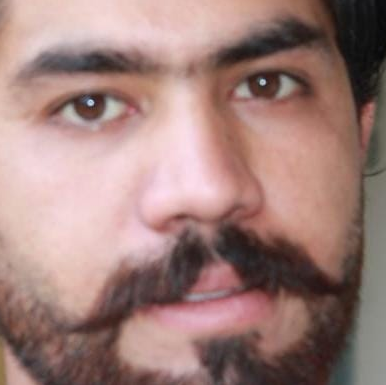

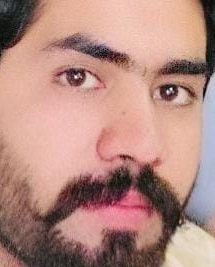

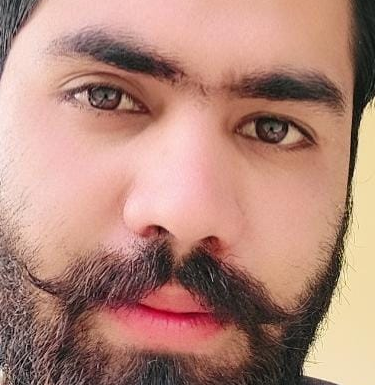

In [ ]:
from google.colab.patches import cv2_imshow # for image display
for i in range(10):
  img = images[i-1]
  face = faceOfImg(img)
  cv2_imshow(face)
#print(face)

In [ ]:
import pathlib
#dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
#data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path("/content/dataset")

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

130


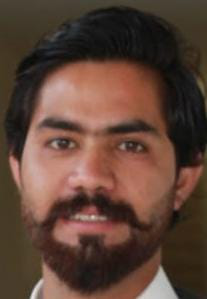

In [ ]:

sampleimg = list(data_dir.glob('Usamaali/*'))
PIL.Image.open(str(sampleimg[0]))

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 130 files belonging to 13 classes.
Using 104 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 130 files belonging to 13 classes.
Using 26 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Abidullah', 'Ajmal khan', 'Alam shah', 'Fahad faraz', 'Ihsan', 'Jameel yusaf', 'Junaid', 'Mubshair khan', 'Mubshair sardar', 'Sajid', 'Sami', 'Usamaali', 'Waseem']


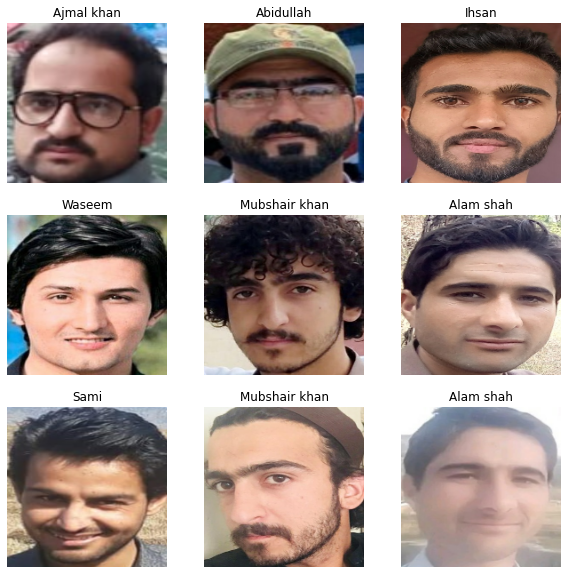

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.0 0.9852724


In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
4/4 [==============================] - 3s 161ms/step - loss: 2.8064 - accuracy: 0.0385 - val_loss: 2.6617 - val_accuracy: 0.0000e+00
Epoch 2/10
4/4 [==============================] - 0s 27ms/step - loss: 2.5086 - accuracy: 0.1442 - val_loss: 2.6379 - val_accuracy: 0.0000e+00
Epoch 3/10
4/4 [==============================] - 0s 30ms/step - loss: 2.3752 - accuracy: 0.1442 - val_loss: 2.6064 - val_accuracy: 0.1154
Epoch 4/10
4/4 [==============================] - 0s 26ms/step - loss: 2.1269 - accuracy: 0.3654 - val_loss: 2.5414 - val_accuracy: 0.1154
Epoch 5/10
4/4 [==============================] - 0s 28ms/step - loss: 1.7960 - accuracy: 0.4615 - val_loss: 2.1933 - val_accuracy: 0.2308
Epoch 6/10
4/4 [==============================] - 0s 26ms/step - loss: 1.3760 - accuracy: 0.5865 - val_loss: 1.9243 - val_accuracy: 0.3077
Epoch 7/10
4/4 [==============================] - 0s 36ms/step - loss: 0.9144 - accuracy: 0.7885 - val_loss: 1.6614 - val_accuracy: 0.5000
Epoch 8/10
4/4 [==

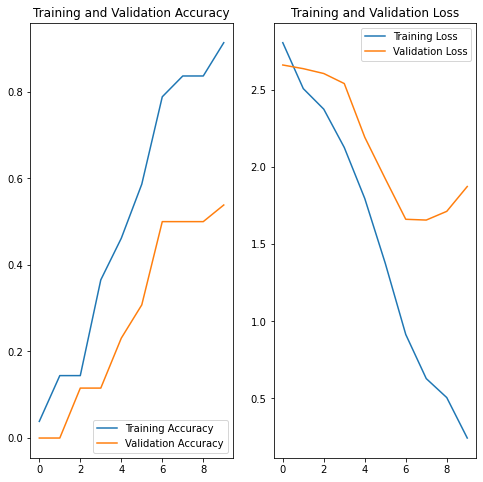

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

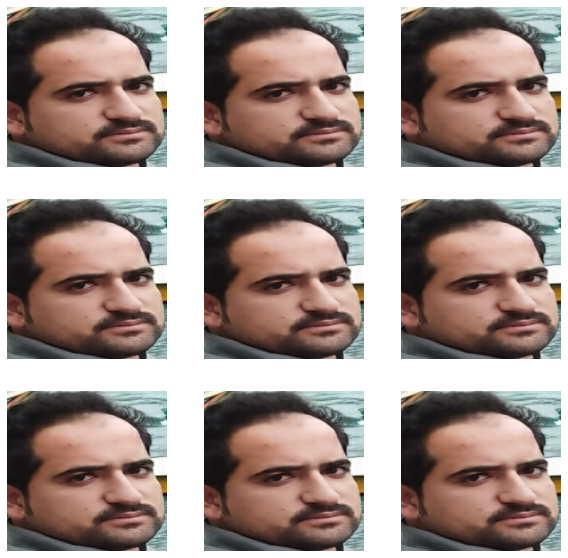

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                 

In [ ]:
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
4/4 [==============================] - 1s 74ms/step - loss: 2.9257 - accuracy: 0.0288 - val_loss: 2.6930 - val_accuracy: 0.0769
Epoch 2/50
4/4 [==============================] - 0s 44ms/step - loss: 2.5467 - accuracy: 0.0962 - val_loss: 2.5901 - val_accuracy: 0.0000e+00
Epoch 3/50
4/4 [==============================] - 0s 37ms/step - loss: 2.5268 - accuracy: 0.0962 - val_loss: 2.5902 - val_accuracy: 0.0000e+00
Epoch 4/50
4/4 [==============================] - 0s 37ms/step - loss: 2.3980 - accuracy: 0.1538 - val_loss: 2.5914 - val_accuracy: 0.0385
Epoch 5/50
4/4 [==============================] - 0s 33ms/step - loss: 2.3067 - accuracy: 0.1923 - val_loss: 2.5553 - val_accuracy: 0.1154
Epoch 6/50
4/4 [==============================] - 0s 28ms/step - loss: 2.1230 - accuracy: 0.3077 - val_loss: 2.4279 - val_accuracy: 0.1538
Epoch 7/50
4/4 [==============================] - 0s 28ms/step - loss: 2.0050 - accuracy: 0.3462 - val_loss: 2.3970 - val_accuracy: 0.0769
Epoch 8/50
4/4 [===

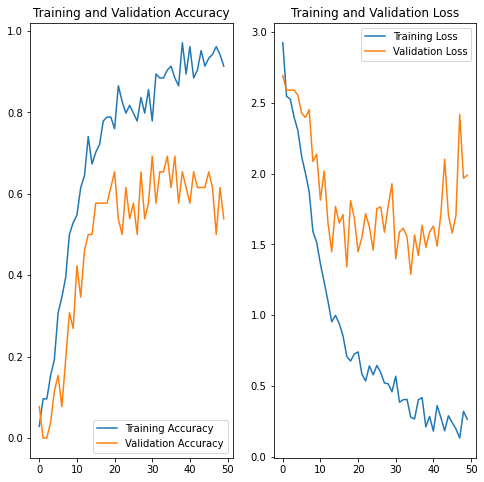

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
#sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
#img_path = "/content/dataset/Abidullah/Abid1.jpg"
#img_path = "/content/dataset/Ajmal khan/Ajmal1.jpg"
#img_path = "/content/dataset/Alam shah/alamshah1.jpgg"
#img_path = "/content/dataset/Fahad faraz/fahafaraz1.jpg"
#img_path = "/content/dataset/Ihsan/ihsasn1.jpg"
#img_path = "/content/dataset/Jameel yusaf/jameel1.jpg"
#img_path = "/content/dataset/Junaid/junaid1.jpg"
#img_path = "/content/dataset/Mubshair khan/mubshair1.jpg"
#img_path = "/content/dataset/Mubshair sardar/mubshairsardar1.jpg"
#img_path = "/content/dataset/Sajid/sajid1.jpg"
#img_path = "/content/dataset/Sami/sami1.jpg"
img_path = "/content/dataset/Usamaali/Usama5.jpg"


img = tf.keras.utils.load_img(
    img_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Usamaali with a 97.24 percent confidence.


In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
#image Dimention for Processing
dim = (img_width, img_height)
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])
    try:
      face = faceOfImg(img)

      # resize image
      face = cv2.resize(face, dim, interpolation = cv2.INTER_AREA)

      img_array = tf.keras.utils.img_to_array(face)
      img_array = tf.expand_dims(img_array, 0) # Create a batch
      
      predictions = model.predict(img_array)
      #print(predictions)
      score = tf.nn.softmax(predictions[0])

      #print(
      #    "This image most likely belongs to {} with a {:.2f} percent confidence."
      #    .format(class_names[np.argmax(score)], 100 * np.max(score))
      #)
      
      label_html =  "Matching to {0}, With Confdance schore of {1}".format(class_names[np.argmax(score)],100 * np.max(score))
      bbox = [0, 100, 100, 200]
      #image = cv2.rectangle(image, start_point, end_point, color, thickness)
      #video_frame(label, bbox)
      if(np.max(score) > .7):
        attendance(class_names[np.argmax(score)])
        #cv2_imshow(face)
        # label for video        
        #label_html =  "My name is {0}, I'm {1}".format(class_names[np.argmax(score)],conf_score = 100 * np.max(score))
        #print(txt)
        # initialze bounding box to empty
        #bbox = ''
    except:
      print("An exception occurred")
    

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # get face region coordinates
    #faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    #for (x,y,w,h) in faces:
     # bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

   # bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>